In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import sklearn.metrics as sklm
import sklearn as sk

from sklearn.impute import SimpleImputer

import prepare
import acquire

In [2]:
seed = 123


# Metrics Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:



1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [3]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
# df.head()
train, validate, test = prepare.train_validate_test_split(df)
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [4]:
train.survived.value_counts() # Baseline = everyone dies.


0    302
1    196
Name: survived, dtype: int64

In [17]:
train.survived.mode()[0]

0

In [18]:
train['model_baseline'] = train.survived.mode()[0]
train.model_baseline.head()

689    0
84     0
738    0
441    0
643    0
Name: model_baseline, dtype: int64

In [19]:
pd.DataFrame(classification_report(train.survived, train.model_baseline, output_dict=True))

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0,1,accuracy,macro avg,weighted avg
precision,0.606426,0.0,0.606426,0.303213,0.367752
recall,1.000000,0.0,0.606426,0.500000,0.606426
f1-score,0.755000,0.0,0.606426,0.377500,0.457851
support,302.000000,196.0,0.606426,498.000000,498.000000


In [20]:
1- train.survived.mean() #We can just predict accuracy this way

0.606425702811245

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [21]:
def split_x_y(df, target, features):
    x = df[features]
    y = df[target]
    return x, y

In [22]:
y_train = train.survived
x_train = train[['pclass','sex_male','fare','alone','embark_town_Queenstown','embark_town_Southampton']]
x_train.head()

,pclass,sex_male,fare,alone,embark_town_Queenstown,embark_town_Southampton
689,1,0,211.3375,0,0,1
84,2,0,10.5000,1,0,1
738,3,1,7.8958,1,0,1
441,3,1,9.5000,1,0,1
643,3,1,56.4958,1,0,1


In [23]:
tree = DecisionTreeClassifier(max_depth = 3)

In [24]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
tree.classes_

array([0, 1], dtype=int64)

In [26]:
print(
    export_text(decision_tree=tree, feature_names=x_train.columns.tolist())
)

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- fare <= 26.12
|   |   |   |--- class: 1
|   |   |--- fare >  26.12
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- class: 1
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- pclass <= 1.50
|   |   |--- fare <= 26.11
|   |   |   |--- class: 0
|   |   |--- fare >  26.11
|   |   |   |--- class: 0
|   |--- pclass >  1.50
|   |   |--- fare <= 7.91
|   |   |   |--- class: 0
|   |   |--- fare >  7.91
|   |   |   |--- class: 0



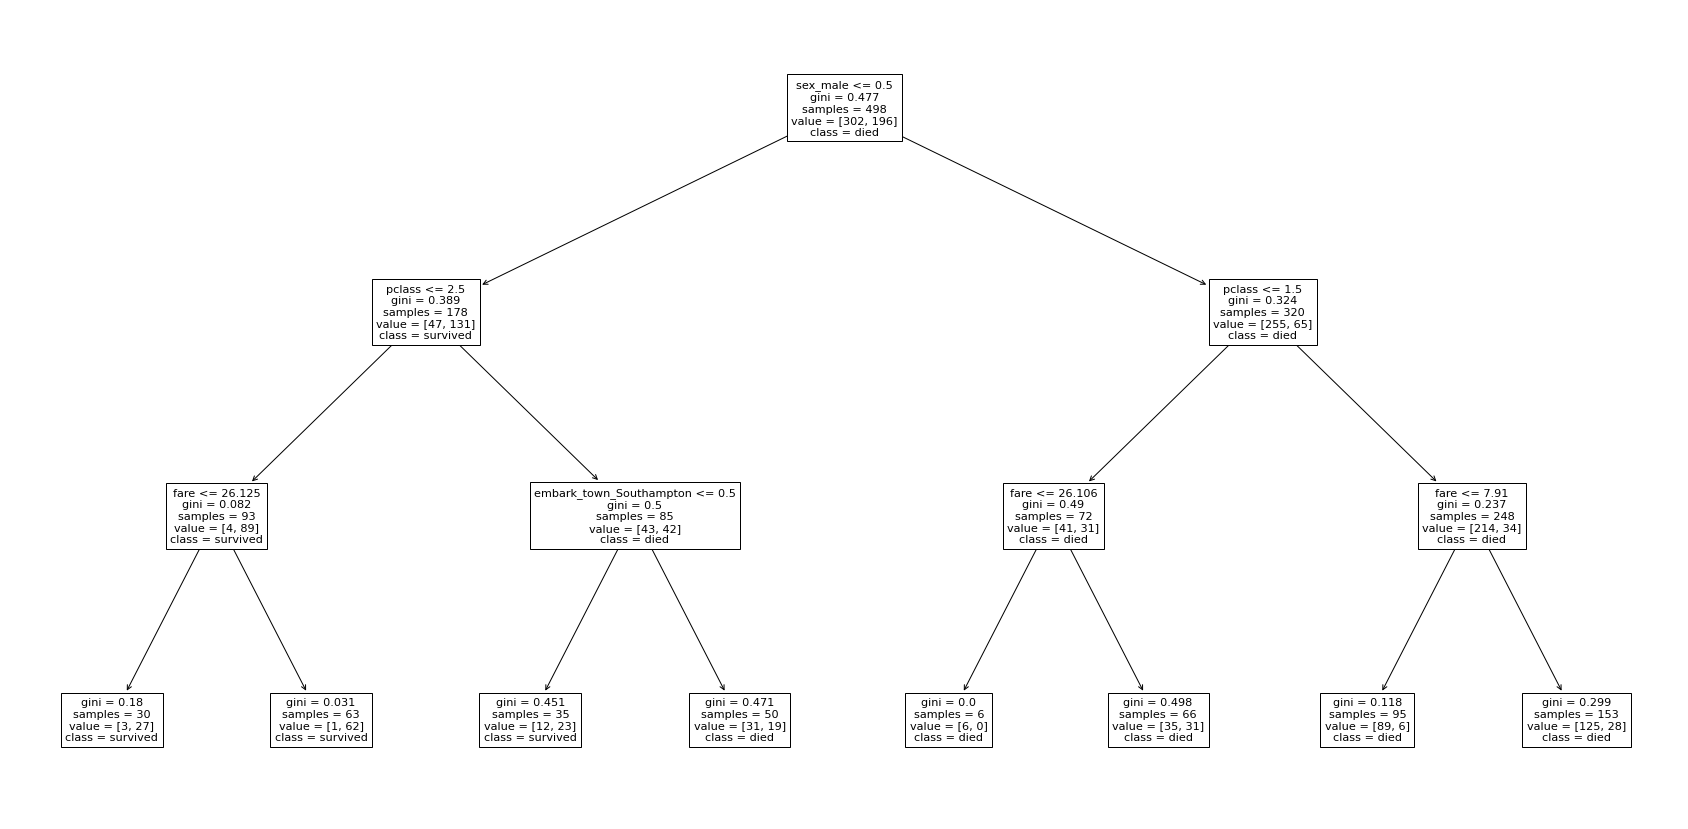

In [27]:
plt.figure(figsize=(30, 15))
plot_tree(tree, feature_names=x_train.columns, class_names=['died','survived'])
plt.show()

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [28]:
predictions = tree.predict(x_train)
actual = y_train
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       302
           1       0.88      0.57      0.69       196

    accuracy                           0.80       498
   macro avg       0.82      0.76      0.77       498
weighted avg       0.81      0.80      0.79       498



In [29]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,286,16
1,84,112


In [30]:
def get_tn_fp_fn_tp_from_confusion_matrix(matrix):
    tn, fp, fn, tp = matrix.ravel()
    return tn, fp, fn, tp

In [31]:
tn, fp, fn, tp = confusion_matrix(y_true=actual,y_pred=predictions).ravel()
tn, fp, fn, tp


(286, 16, 84, 112)

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [32]:
score = {
        'accuracy' : sklm.accuracy_score(actual, predictions) ,
        'true_positive_rate' : tp/(tp+fp) ,
        'false_positive_rate' : fp/(tp+fp) ,
        'true_negative_rate' : tn/(tn+fn) ,
        'false_negative_rate' : fn/(tn+fn) ,
        'precision' : sklm.precision_score(actual, predictions),
        'recall'    : sklm.recall_score(actual, predictions),
        'f1-score'  : sklm.f1_score(actual, predictions),
        'support_negative' : actual.value_counts()[0],
        'support_positive' : actual.value_counts()[1]
        }
score

{'accuracy': 0.7991967871485943,
 'true_positive_rate': 0.875,
 'false_positive_rate': 0.125,
 'true_negative_rate': 0.772972972972973,
 'false_negative_rate': 0.22702702702702704,
 'precision': 0.875,
 'recall': 0.5714285714285714,
 'f1-score': 0.691358024691358,
 'support_negative': 302,
 'support_positive': 196}

In [33]:
classification_report(actual, predictions, output_dict=True)

{'0': {'precision': 0.772972972972973,
  'recall': 0.9470198675496688,
  'f1-score': 0.8511904761904762,
  'support': 302},
 '1': {'precision': 0.875,
  'recall': 0.5714285714285714,
  'f1-score': 0.691358024691358,
  'support': 196},
 'accuracy': 0.7991967871485943,
 'macro avg': {'precision': 0.8239864864864865,
  'recall': 0.7592242194891201,
  'f1-score': 0.7712742504409171,
  'support': 498},
 'weighted avg': {'precision': 0.8131281884293933,
  'recall': 0.7991967871485943,
  'f1-score': 0.788284531423755,
  'support': 498}}

5. Run through steps 2-4 using a different max_depth value.



In [34]:
def test_tree(x, y, depth, score_x=None, score_y=None):
    tree = DecisionTreeClassifier(max_depth = depth)
    tree.fit(x, y)
    predictions = tree.predict(score_x) if isinstance(score_x, pd.DataFrame) else tree.predict(x)
    actual = score_y if isinstance(score_y, pd.Series) else y
    tn, fp, fn, tp = confusion_matrix(y_true=actual,y_pred=predictions).ravel()
    score = {
        depth : {
            'accuracy' : sklm.accuracy_score(actual, predictions) ,
            'true_positive_rate' : tp/(tp+fp) ,
            'false_positive_rate' : fp/(tp+fp) ,
            'true_negative_rate' : tn/(tn+fn) ,
            'false_negative_rate' : fn/(tn+fn) ,
            'precision' : sklm.precision_score(actual, predictions),
            'recall'    : sklm.recall_score(actual, predictions),
            'f1-score'  : sklm.f1_score(actual, predictions),
            'support_negative' : actual.value_counts()[0],
            'support_positive' : actual.value_counts()[1]
            }
        }
    return pd.DataFrame(score)
    

In [35]:
def binary_classifier_stats(actual, predictions):
    tn, fp, fn, tp = confusion_matrix(actual,predictions).ravel()
    stats = {
            'accuracy' : sklm.accuracy_score(actual, predictions) ,
            'true_positive_rate' : tp/(tp+fp) ,
            'false_positive_rate' : fp/(tp+fp) ,
            'true_negative_rate' : tn/(tn+fn) ,
            'false_negative_rate' : fn/(tn+fn) ,
            'precision' : sklm.precision_score(actual, predictions),
            'recall'    : sklm.recall_score(actual, predictions),
            'f1-score'  : sklm.f1_score(actual, predictions),
            'support_negative' : actual.value_counts()[0],
            'support_positive' : actual.value_counts()[1]
            }
    return stats

In [36]:
type(None)

NoneType

In [37]:
test_tree(x_train, y_train, 2).index.tolist()

['accuracy',
 'f1-score',
 'false_negative_rate',
 'false_positive_rate',
 'precision',
 'recall',
 'support_negative',
 'support_positive',
 'true_negative_rate',
 'true_positive_rate']

In [38]:
my_index =  ['accuracy',
            'precision',
            'recall',
            'f1-score',
            'support_negative',
            'support_positive',
            'false_negative_rate',
            'false_positive_rate',
            'true_negative_rate',
            'true_positive_rate']

6. Which model performs better on your in-sample data?



In [39]:
depths = range(1,11)
out = pd.DataFrame(index=my_index)
for depth in depths:
    temp = test_tree( x_train, y_train, depth)
    out = pd.concat([out, temp], axis=1)
out

,1,2,3,4,5,6,7,8,9,10
accuracy,0.775100,0.777108,0.799197,0.819277,0.835341,0.855422,0.879518,0.895582,0.899598,0.909639
precision,0.735955,0.956989,0.875000,0.839744,0.847561,0.792453,0.904762,0.900000,0.892473,0.899471
recall,0.668367,0.454082,0.571429,0.668367,0.709184,0.857143,0.775510,0.826531,0.846939,0.867347
f1-score,0.700535,0.615917,0.691358,0.744318,0.772222,0.823529,0.835165,0.861702,0.869110,0.883117
support_negative,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
support_positive,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
false_negative_rate,0.203125,0.264198,0.227027,0.190058,0.170659,0.097902,0.133333,0.106918,0.096154,0.084142
false_positive_rate,0.264045,0.043011,0.125000,0.160256,0.152439,0.207547,0.095238,0.100000,0.107527,0.100529
true_negative_rate,0.796875,0.735802,0.772973,0.809942,0.829341,0.902098,0.866667,0.893082,0.903846,0.915858
true_positive_rate,0.735955,0.956989,0.875000,0.839744,0.847561,0.792453,0.904762,0.900000,0.892473,0.899471


> the higher the depth the better it performs on in-sample data

7. Which model performs best on your out-of-sample data, the validate set?



In [40]:
features = ['pclass','sex_male','fare','alone','embark_town_Queenstown','embark_town_Southampton']
x_validate, y_validate = split_x_y(validate, 'survived', features)


In [41]:
depths = range(1,11)
out = pd.DataFrame(index=my_index)
for depth in depths:
    temp = test_tree( x_train, y_train, depth, score_x=x_validate, score_y=y_validate)
    out = pd.concat([out, temp], axis=1)
out

,1,2,3,4,5,6,7,8,9,10
accuracy,0.803738,0.785047,0.813084,0.775701,0.785047,0.780374,0.771028,0.757009,0.761682,0.766355
precision,0.767123,0.948718,0.901961,0.761905,0.769231,0.707317,0.750000,0.693333,0.692308,0.706667
recall,0.691358,0.456790,0.567901,0.592593,0.617284,0.716049,0.592593,0.641975,0.666667,0.654321
f1-score,0.727273,0.616667,0.696970,0.666667,0.684932,0.711656,0.662069,0.666667,0.679245,0.679487
support_negative,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
support_positive,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
false_negative_rate,0.177305,0.251429,0.214724,0.218543,0.208054,0.174242,0.220000,0.208633,0.198529,0.201439
false_positive_rate,0.232877,0.051282,0.098039,0.238095,0.230769,0.292683,0.250000,0.306667,0.307692,0.293333
true_negative_rate,0.822695,0.748571,0.785276,0.781457,0.791946,0.825758,0.780000,0.791367,0.801471,0.798561
true_positive_rate,0.767123,0.948718,0.901961,0.761905,0.769231,0.707317,0.750000,0.693333,0.692308,0.706667


8. Work through these same exercises using the Telco dataset.

In [42]:
isinstance(y_validate, pd.Series)
isinstance(x_validate, pd.DataFrame)

True

## Exercises

Continue working in your `model` file with titanic data to do the following: 



1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [43]:
rf = RandomForestClassifier(max_depth=10,
                            min_samples_leaf = 1,
                            random_state=123)

In [44]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [45]:
round( rf.score(x_train, y_train), 4)

0.9197

2. Evaluate your results using the model score, confusion matrix, and classification report.



In [46]:
predictions = rf.predict(x_train)
actual = y_train

confusion_matrix(actual, predictions)

array([[284,  18],
       [ 22, 174]], dtype=int64)

In [47]:
pd.DataFrame(classification_report(actual, predictions, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.928105,0.906250,0.919679,0.917177,0.919503
recall,0.940397,0.887755,0.919679,0.914076,0.919679
f1-score,0.934211,0.896907,0.919679,0.915559,0.919529
support,302.000000,196.000000,0.919679,498.000000,498.000000


3. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [48]:
binary_classifier_stats(actual, predictions)

{'accuracy': 0.9196787148594378,
 'true_positive_rate': 0.90625,
 'false_positive_rate': 0.09375,
 'true_negative_rate': 0.9281045751633987,
 'false_negative_rate': 0.0718954248366013,
 'precision': 0.90625,
 'recall': 0.8877551020408163,
 'f1-score': 0.8969072164948454,
 'support_negative': 302,
 'support_positive': 196}

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 



In [49]:
import itertools
depths = range(1,11)
min_leafs = range(1,11)
combos = list(itertools.product(depths, min_leafs))

metrics = []
for depth, min_leaf in combos:
    # Make the model and fit it on train data
    rf = RandomForestClassifier(max_depth= depth,
                                min_samples_leaf = min_leaf,
                                random_state=123)
    rf.fit(x_train, y_train)

    #Predict on train data and score it
    predictions = rf.predict(x_train)
    stats = binary_classifier_stats(y_train, predictions)
    stats['combo'] = (depth, min_leaf)
    stats['depth'] = depth
    stats['min_leaf'] = min_leaf
    metrics.append(stats)


In [50]:

df = pd.DataFrame(metrics)
df.head()

,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1-score,support_negative,support_positive,combo,depth,min_leaf
0,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 1)",1,1
1,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 2)",1,2
2,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 3)",1,3
3,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 4)",1,4
4,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 5)",1,5


In [51]:

df = pd.DataFrame(metrics)
df.head()

,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1-score,support_negative,support_positive,combo,depth,min_leaf
0,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 1)",1,1
1,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 2)",1,2
2,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 3)",1,3
3,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 4)",1,4
4,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 5)",1,5


In [52]:

df = pd.DataFrame(metrics)
df.head()

,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1-score,support_negative,support_positive,combo,depth,min_leaf
0,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 1)",1,1
1,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 2)",1,2
2,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 3)",1,3
3,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 4)",1,4
4,0.76506,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 5)",1,5


In [53]:
df.sort_values('accuracy', ascending=False)

,accuracy,true_positive_rate,false_positive_rate,true_negative_rate,false_negative_rate,precision,recall,f1-score,support_negative,support_positive,combo,depth,min_leaf
90,0.919679,0.906250,0.093750,0.928105,0.071895,0.906250,0.887755,0.896907,302,196,"(10, 1)",10,1
70,0.913655,0.922652,0.077348,0.908517,0.091483,0.922652,0.852041,0.885942,302,196,"(8, 1)",8,1
80,0.913655,0.922652,0.077348,0.908517,0.091483,0.922652,0.852041,0.885942,302,196,"(9, 1)",9,1
60,0.901606,0.906077,0.093923,0.899054,0.100946,0.906077,0.836735,0.870027,302,196,"(7, 1)",7,1
91,0.889558,0.877005,0.122995,0.897106,0.102894,0.877005,0.836735,0.856397,302,196,"(10, 2)",10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.765060,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 7)",1,7
7,0.765060,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 8)",1,8
8,0.765060,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 9)",1,9
9,0.765060,0.796992,0.203008,0.753425,0.246575,0.796992,0.540816,0.644377,302,196,"(1, 10)",1,10


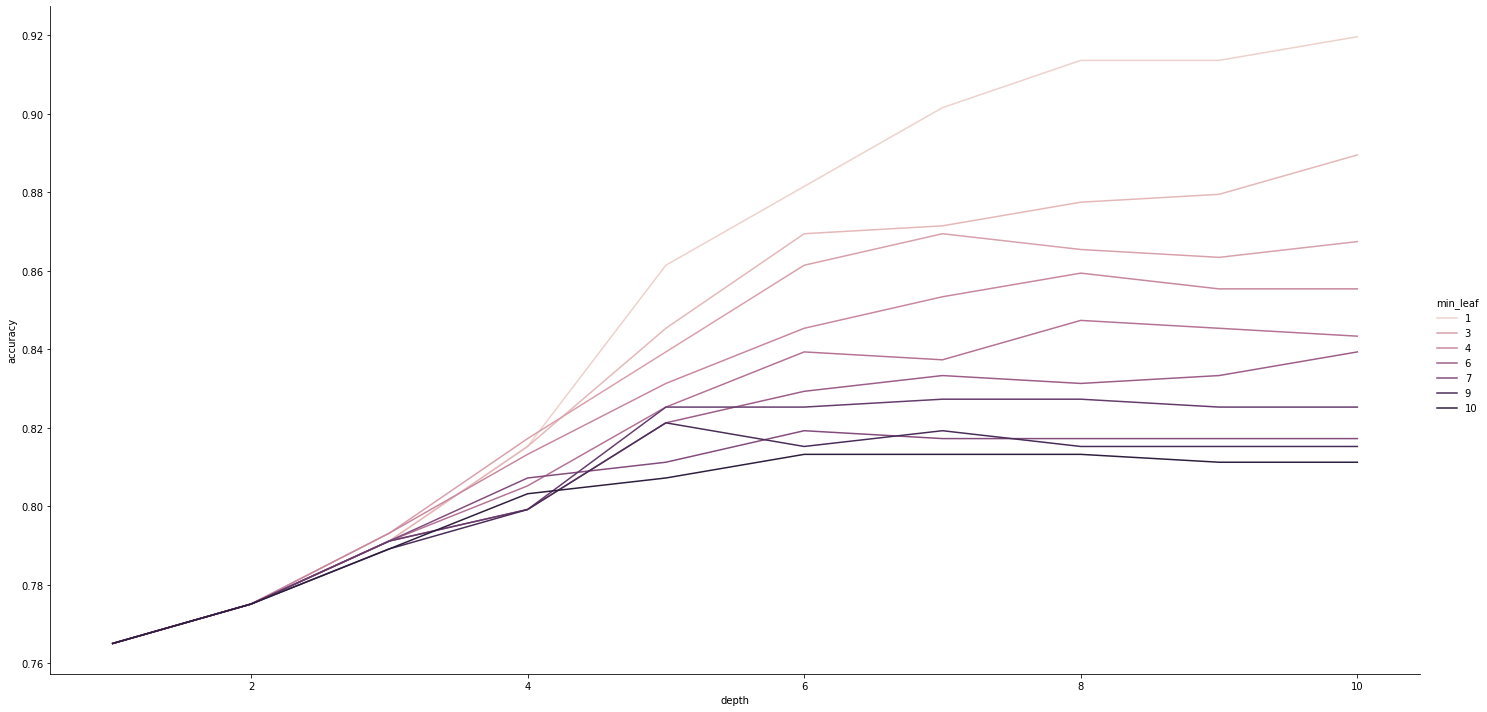

In [54]:
sns.relplot(data=df, x='depth', y='accuracy', hue='min_leaf', aspect=2, height=10, kind='line')

5. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?



After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [55]:
import itertools
depths = range(1,11)
min_leafs = range(1,11)
combos = list(itertools.product(depths, min_leafs))


In [56]:
len(combos)

100

In [57]:

metrics = []
for depth, min_leaf in combos:
    # Make the model and fit it on train data
    rf = RandomForestClassifier(max_depth= depth,
                                min_samples_leaf = min_leaf,
                                random_state=123)
    rf.fit(x_train, y_train)

    #Predict on train data and score it
    predictions = rf.predict(x_train)
    actual = y_train
    stats = {
        'train_accuracy' : round(rf.score(x_train, y_train), 4),
        'validate_accuracy' : round(rf.score(x_validate, y_validate), 4)
    }
    stats['combo'] = (depth, min_leaf)
    stats['depth'] = depth
    stats['min_leaf'] = min_leaf
    metrics.append(stats)

In [58]:

df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df.head()

,train_accuracy,validate_accuracy,combo,depth,min_leaf,difference
0,0.7651,0.7757,"(1, 1)",1,1,-0.0106
1,0.7651,0.7757,"(1, 2)",1,2,-0.0106
2,0.7651,0.7757,"(1, 3)",1,3,-0.0106
3,0.7651,0.7757,"(1, 4)",1,4,-0.0106
4,0.7651,0.7757,"(1, 5)",1,5,-0.0106


In [59]:
x_train.head()

,pclass,sex_male,fare,alone,embark_town_Queenstown,embark_town_Southampton
689,1,0,211.3375,0,0,1
84,2,0,10.5000,1,0,1
738,3,1,7.8958,1,0,1
441,3,1,9.5000,1,0,1
643,3,1,56.4958,1,0,1


In [60]:
rf.feature_importances_

array([0.20151675, 0.495678  , 0.23337445, 0.03338645, 0.01132133,
       0.02472302])

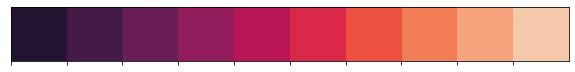

In [61]:
palette = sns.color_palette('rocket', n_colors=10)
palette2 = sns.color_palette('autumn', n_colors=10)
# sns.set_palette(palette)
sns.palplot(palette)


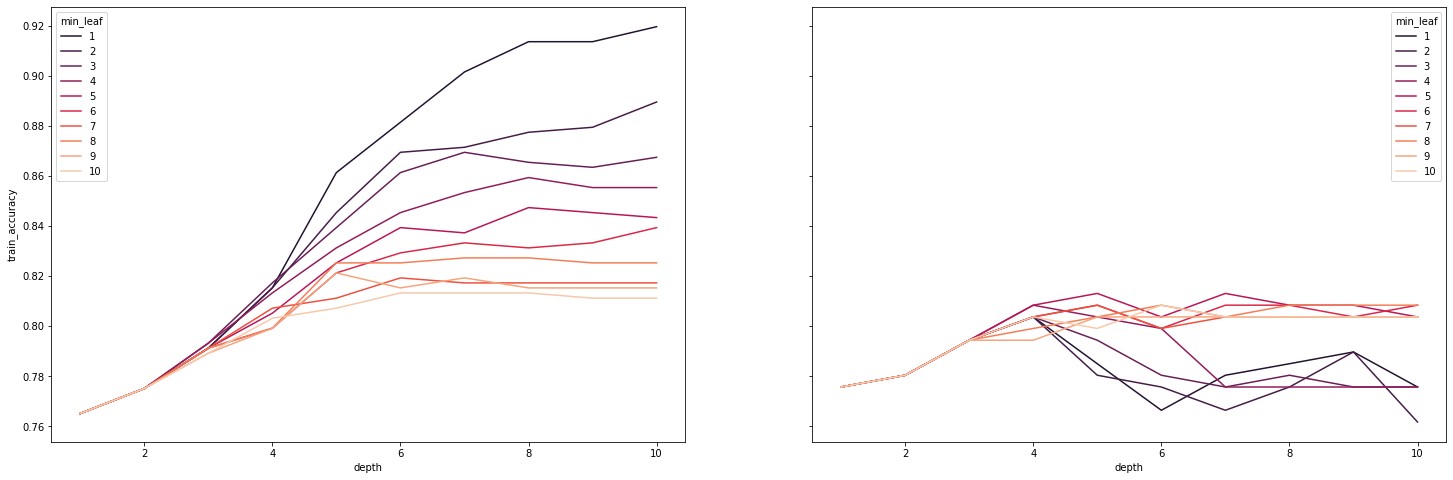

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,8), sharey=True)
sns.lineplot(x=df.depth, y=df.train_accuracy, hue=df.min_leaf, ax=ax1, palette=palette)
sns.lineplot(x=df.depth, y=df.validate_accuracy, hue=df.min_leaf, ax=ax2, palette=palette)

plt.show()

In [63]:
pd.options.display.max_rows = 100 #The output will be long
df.validate_accuracy = round(df.validate_accuracy, 2)
df.difference = round(df.difference, 3)


In [64]:
df[abs(df.difference) < .005].sort_values(['validate_accuracy'], ascending=False)

,train_accuracy,validate_accuracy,combo,depth,min_leaf,difference
34,0.8052,0.81,"(4, 5)",4,5,-0.003
46,0.8112,0.81,"(5, 7)",5,7,0.003
35,0.7992,0.80,"(4, 6)",4,6,-0.004
36,0.8072,0.80,"(4, 7)",4,7,0.004
37,0.7992,0.80,"(4, 8)",4,8,0.000
39,0.8032,0.80,"(4, 10)",4,10,-0.000
20,0.7912,0.79,"(3, 1)",3,1,-0.003
21,0.7912,0.79,"(3, 2)",3,2,-0.003
22,0.7932,0.79,"(3, 3)",3,3,-0.001
23,0.7932,0.79,"(3, 4)",3,4,-0.001


> I like (4, 8) the most

In [65]:
rf = RandomForestClassifier(max_depth= 4,
                            min_samples_leaf = 8,
                            random_state=123)
rf.fit(x_train, y_train)
x_test, y_test = split_x_y(test, 'survived', features)
rf.score(x_test, y_test)

0.8268156424581006

# KNN Exercises

Continue working in your `model.ipynb` file with the titanic dataset.



1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [66]:
x_train.head()

,pclass,sex_male,fare,alone,embark_town_Queenstown,embark_town_Southampton
689,1,0,211.3375,0,0,1
84,2,0,10.5000,1,0,1
738,3,1,7.8958,1,0,1
441,3,1,9.5000,1,0,1
643,3,1,56.4958,1,0,1


In [67]:
x_train_orig = x_train


In [68]:
# To combat dimensionality I'll drop embark town columns and the alone column.
x_train = x_train.drop(columns= ['fare','embark_town_Queenstown', 'embark_town_Southampton'])
x_validate = x_validate.drop(columns= ['fare','embark_town_Queenstown', 'embark_town_Southampton'])
x_test = x_test.drop(columns= ['fare','embark_town_Queenstown', 'embark_town_Southampton'])
x_train.columns, x_validate.columns, x_test.columns

(Index(['pclass', 'sex_male', 'alone'], dtype='object'),
 Index(['pclass', 'sex_male', 'alone'], dtype='object'),
 Index(['pclass', 'sex_male', 'alone'], dtype='object'))

<AxesSubplot:xlabel='pclass', ylabel='alone'>

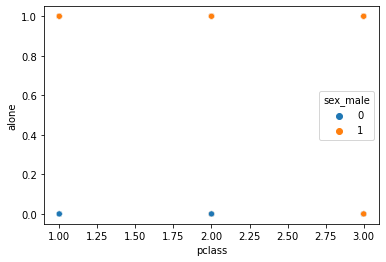

In [69]:
sns.scatterplot(data=x_train, x='pclass', y='alone', hue='sex_male')

In [70]:
from sklearn.neighbors import KNeighborsClassifier


In [71]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [72]:
pred = knn.predict(x_train)
pred[:10], y_train.tolist()[:10]

(array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 [1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

2. Evaluate your results using the model score, confusion matrix, and classification report.



In [73]:
knn.score(x_train, y_train)

0.7771084337349398

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


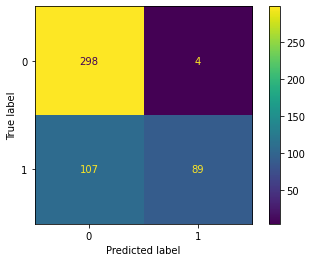

In [74]:
plot_confusion_matrix(knn, x_train, y_train)

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


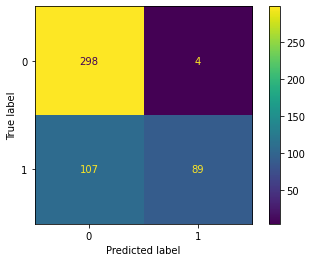

In [75]:
plot_confusion_matrix(knn, x_train, y_train)

In [76]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.84       302
           1       0.96      0.45      0.62       196

    accuracy                           0.78       498
   macro avg       0.85      0.72      0.73       498
weighted avg       0.82      0.78      0.75       498



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [77]:
actual = y_train
pred = pred
binary_classifier_stats(actual, pred)

{'accuracy': 0.7771084337349398,
 'true_positive_rate': 0.956989247311828,
 'false_positive_rate': 0.043010752688172046,
 'true_negative_rate': 0.7358024691358025,
 'false_negative_rate': 0.2641975308641975,
 'precision': 0.956989247311828,
 'recall': 0.45408163265306123,
 'f1-score': 0.615916955017301,
 'support_negative': 302,
 'support_positive': 196}

4. Run through steps 2-4 setting k to 10



KNN 10: 0.7630522088353414
accuracy: 0.7630522088353414
true_positive_rate: 0.7241379310344828
false_positive_rate: 0.27586206896551724
true_negative_rate: 0.7839506172839507
false_negative_rate: 0.21604938271604937
precision: 0.7241379310344828
recall: 0.6428571428571429
f1-score: 0.6810810810810811
support_negative: 302
support_positive: 196


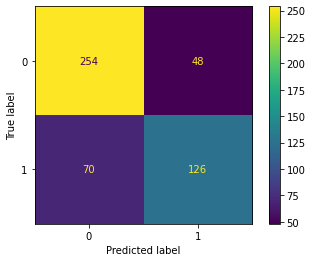

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       302
           1       0.72      0.64      0.68       196

    accuracy                           0.76       498
   macro avg       0.75      0.74      0.75       498
weighted avg       0.76      0.76      0.76       498



In [78]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(x_train, y_train)
print('KNN 10:', knn.score(x_train, y_train))
pred = knn.predict(x_train)
actual = y_train
stats = binary_classifier_stats(actual, pred)
for k, v in stats.items():
    print(k+':', v )
sk.metrics.ConfusionMatrixDisplay.from_estimator(knn, x_train, y_train)
plt.show()

print(classification_report(actual, pred))

5. Run through setps 2-4 setting k to 20



KNN 10: 0.7791164658634538
accuracy: 0.7791164658634538
true_positive_rate: 0.8307692307692308
false_positive_rate: 0.16923076923076924
true_negative_rate: 0.7608695652173914
false_negative_rate: 0.2391304347826087
precision: 0.8307692307692308
recall: 0.5510204081632653
f1-score: 0.6625766871165644
support_negative: 302
support_positive: 196


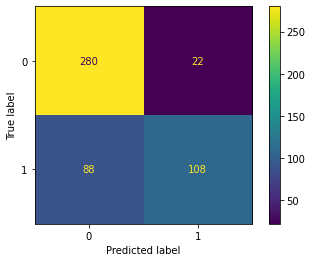

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       302
           1       0.83      0.55      0.66       196

    accuracy                           0.78       498
   macro avg       0.80      0.74      0.75       498
weighted avg       0.79      0.78      0.77       498



In [79]:
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn.fit(x_train, y_train)
print('KNN 10:', knn.score(x_train, y_train))
pred = knn.predict(x_train)
actual = y_train
stats = binary_classifier_stats(actual, pred)
for k, v in stats.items():
    print(k+':', v )
sk.metrics.ConfusionMatrixDisplay.from_estimator(knn, x_train, y_train)
plt.show()

print(classification_report(actual, pred))

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [80]:
# Accuracy seems to suffer with increased neighbors because we are only testing against our in-sample data.

7. Which model performs best on our out-of-sample data from validate?


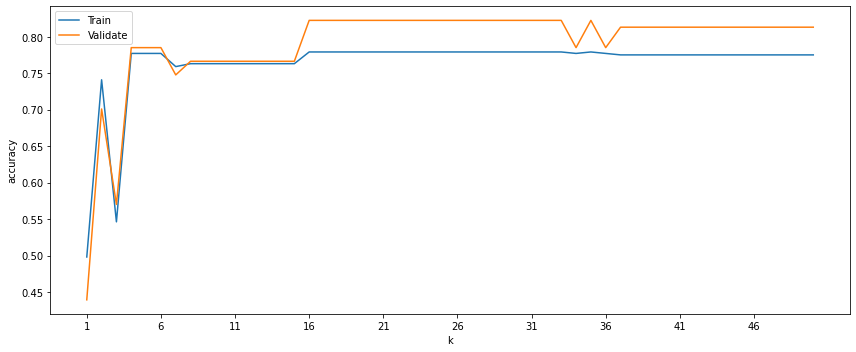

[0.4979919678714859, 0.7409638554216867, 0.5461847389558233, 0.7771084337349398, 0.7771084337349398, 0.7771084337349398, 0.7590361445783133, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7771084337349398, 0.7791164658634538, 0.7771084337349398, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257]

In [81]:
k_range = range(1,51)
train_scores = []
validate_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    validate_scores.append(knn.score(x_validate, y_validate))

plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks(range(1,51,5))
plt.show()
print(train_scores)
print('\n')
print(validate_scores)

> 2 knn seems to work best on out of sample data

#### Trying something else

In [82]:
x_train.columns

Index(['pclass', 'sex_male', 'alone'], dtype='object')

c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex_male', ylabel='alone'>

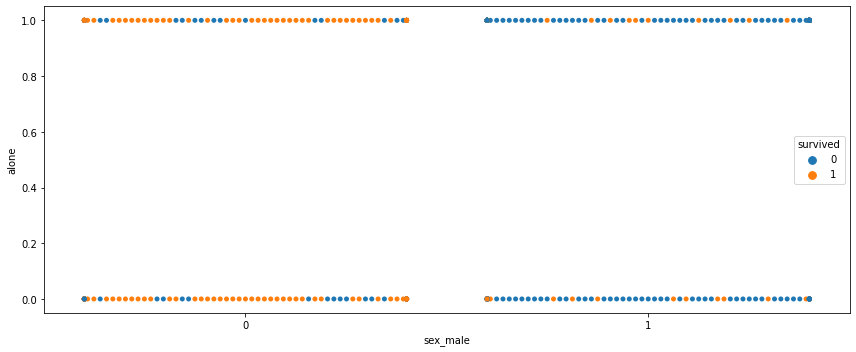

In [83]:
sns.swarmplot(x=train.sex_male, y=train.alone, hue=y_train)

In [84]:
#What if we drop pclass?
x_alter = train[['sex_male','alone']]
x_alter.columns

Index(['sex_male', 'alone'], dtype='object')

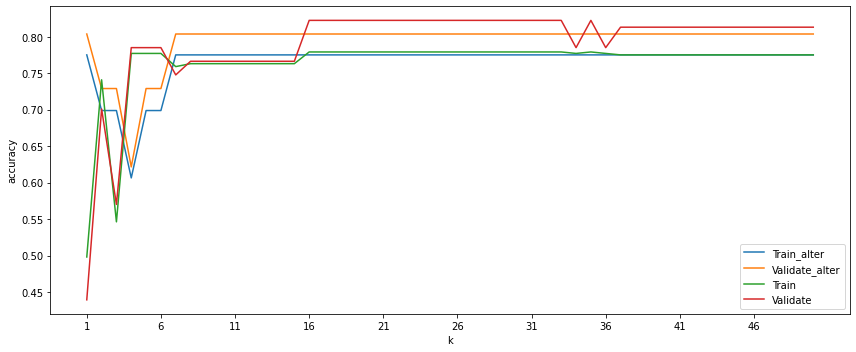

[0.4979919678714859, 0.7409638554216867, 0.5461847389558233, 0.7771084337349398, 0.7771084337349398, 0.7771084337349398, 0.7590361445783133, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7630522088353414, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7791164658634538, 0.7771084337349398, 0.7791164658634538, 0.7771084337349398, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257, 0.7751004016064257]

In [85]:
k_range = range(1,51)
alter_train_scores = []
alter_validate_scores = []
train_scores = []
validate_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    validate_scores.append(knn.score(x_validate, y_validate))
    
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(x_alter, y_train)
    alter_train_scores.append(knn.score(x_alter, y_train))
    alter_validate_scores.append(knn.score(validate[['sex_male','alone']], y_validate))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, alter_train_scores, label='Train_alter')
plt.plot(k_range, alter_validate_scores, label='Validate_alter')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks(range(1,51,5))
plt.show()
print(train_scores)
print('\n')
print(validate_scores)
print('\n')
print(alter_train_scores)
print('\n')
print(alter_validate_scores)

In [86]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,model_baseline
689,689,1,1,female,0,1,211.3375,Southampton,0,0,0,1,0
84,84,1,2,female,0,0,10.5000,Southampton,1,0,0,1,0
738,738,0,3,male,0,0,7.8958,Southampton,1,1,0,1,0
441,441,0,3,male,0,0,9.5000,Southampton,1,1,0,1,0
643,643,1,3,male,0,0,56.4958,Southampton,1,1,0,1,0



-------

Once you have completed work on the titanic dataset, try building some knn models with your telco data.

> see [`./telco_ml.ipynb`](./telco_ml.ipynb)

# Logistic Regression Exercises


In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

> For all of the models you create, choose a threshold that optimizes for accuracy.




#### Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?



##### Asking for age that I don't have so re-prepare

In [87]:
## I think I dropped age in prepare.py so i'll go grab it real quick.
titanic = acquire.get_titanic_data()
titanic.age.isna().sum()


177

In [131]:
p_titanic = prepare.prep_titanic(titanic)
train, validate, test = prepare.train_validate_test_split(p_titanic, stratify='survived')

In [132]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0


In [133]:
train.columns.tolist()
features = ['age',
            'pclass',
            'sibsp',
            'parch',
            'fare',
            'alone',
            'sex_male',
            'embark_town_Queenstown',
            'embark_town_Southampton']

target = 'survived'

In [134]:
train.join(titanic.age, how='left').age.isna().sum() + \
validate.join(titanic.age, how='left').age.isna().sum() + \
test.join(titanic.age, how='left').age.isna().sum()


177

In [135]:
def titanic_impute_age(df):
    titanic = acquire.get_titanic_data()
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df = df.join(titanic.age, how='left')
    imputer.fit(df[['age']])
    df['age'] = imputer.transform(df[['age']])
    df['age'] = round(df.age, 0)
    return df

titanic_impute_age( train.head() )
#Throwing this in my prepare.py file for later use

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,age
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0,36.0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1,9.0
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1,7.0
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1,50.0
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0,26.0


In [136]:
train = titanic_impute_age(train)
validate = titanic_impute_age(validate)
test = titanic_impute_age(test)
train.shape, validate.shape, test.shape

((498, 13), (214, 13), (179, 13))

In [137]:
train.age.isna().sum()

0

In [138]:
x_train, y_train = prepare.split_x_y(train, target, features)
x_validate, y_validate = prepare.split_x_y(validate, target, features)
x_test, y_test = prepare.split_x_y(test, target, features)

##### Now that that's done

In [139]:
# Declare the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, random_state=seed)

In [140]:
# fit the model to training data
feats = ['age','fare','pclass']
x_train_logreg = x_train[feats]


logreg.fit(x_train_logreg, y_train)

LogisticRegression(C=1, random_state=123)

In [143]:
baseline_accuracy = 1- y_train.mean()
baseline_accuracy

0.6164658634538153

In [144]:
logreg.score(x_train_logreg, y_train)

0.7028112449799196

#### Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.



In [146]:
# Declare the model
logreg = LogisticRegression(C=1, random_state=seed)
# Collect our features
feats = ['age','fare','pclass', 'sex_male']
x = x_train[feats]
y = y_train
# Fit the Model
logreg.fit(x, y)
# Score the model
logreg.score(x, y)

0.8132530120481928

#### Try out other combinations of features and models.



In [147]:
# Let's just throw everything in there and see what happens
logreg = LogisticRegression(C=1, random_state=seed)
logreg.fit(x_train, y_train)
logreg.score(x_train, y_train)



c:\Users\Crux\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8152610441767069

In [155]:
logreg.coef_.round(2)

array([[-0.04, -1.15, -0.47, -0.1 , -0.  , -0.49, -2.7 ,  0.91,  0.19]])

In [148]:
x_train.columns.tolist()

['age',
 'pclass',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

#### Use you best 3 models to predict and evaluate on your validate sample.



In [156]:
def train_logreg(feats, C=1):
    # Declare the model
    logreg = LogisticRegression(C=C, random_state=seed)
    # Collect our features
    x = x_train[feats]
    y = y_train
    # Fit the Model
    logreg.fit(x, y)
    return logreg

In [157]:
feats = ['age',
        'pclass',
        'fare',
        'alone',
        'sex_male'
        ]

logreg = train_logreg(feats)


In [161]:
logreg.score (x_validate[feats], y_validate)

0.7757009345794392

#### Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?


In [162]:
from itertools import chain, combinations
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [171]:
superset = list(powerset(x_train.columns.tolist()))
feats_to_try = [subset for subset in superset if len(subset) > 1 and len(subset) < 5]


In [173]:
list(feats_to_try[0])

['age', 'pclass']

In [175]:

output = []
for feats in feats_to_try:
    logreg = train_logreg(list(feats))
    stats = {
        'features' : feats,
        'feat_length': len(feats),
        'train_accuracy': logreg.score(x_train[list(feats)], y_train),
        'validate_accuracy': logreg.score(x_validate[list(feats)], y_validate)
        }
    output.append(stats)

df = pd.DataFrame(output)
df["difference"] = df.train_accuracy - df.validate_accuracy

In [179]:
df.sort_values('validate_accuracy', ascending=False).head()

,features,feat_length,train_accuracy,validate_accuracy,difference
231,"(parch, fare, alone, sex_male)",4,0.797189,0.780374,0.016815
157,"(age, parch, fare, sex_male)",4,0.797189,0.780374,0.016815
235,"(parch, fare, sex_male, embark_town_Southampton)",4,0.793173,0.775701,0.017472
128,"(age, pclass, parch, sex_male)",4,0.813253,0.775701,0.037552
132,"(age, pclass, fare, sex_male)",4,0.813253,0.775701,0.037552



### Bonus1 
How do different strategies for handling the missing values in the age column affect model performance?

### Bonus2: 
How do different strategies for encoding sex affect model performance?

### Bonus3: 
scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.

Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
$$ C = .01, .1, 1, 10, 100, 1000 $$

### Bonus Bonus: how does scaling the data interact with your choice of C?